In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [5]:
%cd

C:\Users\Robin G


In [6]:
#reading the data
data = pd.read_csv("CC_GENERAL.csv")

In [7]:
data.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [8]:
data.shape

(8950, 18)

In [12]:
import pandas_profiling 

In [13]:
pandas_profiling.ProfileReport(data)

In [93]:
#checking for the null values
data.isnull().any()

CUST_ID                              True
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
Monthly_avg_purchase                False
Monthly_cash_advance                False
purchase_type                        True
limit_usage                         False
payment_minpay                      False
dtype: bool

In [94]:
data['CREDIT_LIMIT'].describe()

count     8950.000000
mean      4474.421517
std       3551.065552
min        500.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      17000.000000
Name: CREDIT_LIMIT, dtype: float64

In [95]:
data['MINIMUM_PAYMENTS'].describe()

count    8950.000000
mean      766.706247
std      1230.102665
min        20.040613
25%       170.857654
50%       335.628312
75%       864.206542
max      8626.691541
Name: MINIMUM_PAYMENTS, dtype: float64

In [96]:
#filling null value of credit limit with its mean
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)

#filling null value of minimum_payments with its mean
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)

#checking for any null value
data.isnull().sum()

CUST_ID                             8950
BALANCE                                0
BALANCE_FREQUENCY                      0
PURCHASES                              0
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                       0
PURCHASES_TRX                          0
CREDIT_LIMIT                           0
PAYMENTS                               0
MINIMUM_PAYMENTS                       0
PRC_FULL_PAYMENT                       0
TENURE                                 0
Monthly_avg_purchase                   0
Monthly_cash_advance                   0
purchase_type                       8950
limit_usage                            0
payment_minpay                         0
dtype: int64

In [97]:
#description about the data
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1541.046707,0.878083,936.229237,536.493774,384.498368,935.920972,0.490351,0.202458,0.364437,0.134017,...,14.151385,4474.421517,1649.420364,766.706247,0.153715,11.517318,80.556258,84.921098,0.385982,5.219333
std,1966.597484,0.234032,1525.185179,1096.913512,676.271068,1775.774147,0.401371,0.298336,0.397448,0.195550,...,20.962159,3551.065552,2251.668769,1230.102665,0.292499,1.338331,129.551900,163.847435,0.350437,8.123987
min,0.065101,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,500.000000,0.000000,20.040613,0.000000,6.000000,0.000000,0.000000,0.000029,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.907301
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,31.936667,0.000000,0.302720,2.017230
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,97.228333,99.085196,0.717571,6.049228
max,9338.804814,1.000000,8977.290000,6689.898200,3886.240500,9588.163357,1.000000,1.000000,1.000000,0.833333,...,116.510000,17000.000000,13608.715541,8626.691541,1.000000,12.000000,758.652750,896.232349,1.057059,49.357487


# Deriving New KPIs

# 1. Monthly average purchase

In [98]:
data['Monthly_avg_purchase']=data['PURCHASES']/data['TENURE']

In [99]:
data['Monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

# 2. Monthly cash advance amount

In [100]:
data['Monthly_cash_advance']=data['CASH_ADVANCE']/data['TENURE']
data['Monthly_cash_advance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

# 3. Purchase type(Oneoff,Installments)


In [101]:
data.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [102]:
data[(data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 23)

In [103]:
data[(data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 23)

In [104]:
data[(data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 23)

In [105]:
data[(data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 23)

we found four types of purchase behaviour and marked them as a categorical variable on the basis of their behaviour

In [106]:
def purchase(data):
    
   
    if (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']==0):
        return 'only_one_off'
    if (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']>0):
        return 'only_installment'

In [107]:
data['purchase_type']=data.apply(purchase,axis=1)


In [108]:
data['purchase_type'].value_counts()

both_oneoff_installment    2774
only_installment           2260
none                       2042
only_one_off               1874
Name: purchase_type, dtype: int64

# 4. Limit_usage (balance to credit limit ratio ) credit card utilization

In [109]:
data['limit_usage']=data['BALANCE']/data['CREDIT_LIMIT']

In [110]:
data['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

# 5. Payments to minimum payments ratio etc

In [111]:
data['payment_minpay']=data['PAYMENTS']/data['MINIMUM_PAYMENTS']

In [112]:
data['payment_minpay'].head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: payment_minpay, dtype: float64

# Outlier treatment

Using log-transformation to remove outliers effect, as variables having extreme values

In [113]:
data_log=data.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [114]:
data_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.160169,0.620717,4.895139,3.199459,3.348077,3.315944,0.361268,0.158699,0.270072,0.112929,...,1.891305,8.095962,6.620286,5.952924,0.117730,2.519680,3.046372,2.160831,0.294688,1.341853
std,2.008137,0.145539,2.909699,3.237351,3.075512,3.560867,0.277317,0.216672,0.281852,0.154677,...,1.365930,0.811006,1.583113,1.135836,0.211617,0.130367,1.993794,2.423444,0.247833,0.902810
min,0.063069,0.087011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.216606,0.000000,3.046455,0.000000,1.945910,0.000000,0.000000,0.000007,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040614,0.645689
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.818979,0.000000,2.564949,3.494587,0.000000,0.263891,1.102974
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.762968,0.133531,2.564949,4.587295,4.606022,0.535461,1.946465
max,9.142041,0.693147,9.102565,8.808503,8.265455,9.168389,0.693147,0.693147,0.693147,0.606136,...,4.766523,9.741027,9.518539,9.062732,0.693147,2.564949,7.260703,7.377151,1.109743,6.522176


In [115]:
column=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
data_pre=data_log[[x for x in data_log.columns if x not in column ]]

In [116]:
data_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay'],
      dtype='object')

In [117]:
data_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')

# Insights from new KPIs

In [291]:
#Average payment_minpayment ratio for each purchse type
new_data=data.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(new_data)
new_data.values

array([7.03874803, 5.39519352, 3.98587739, 5.1759436 ])

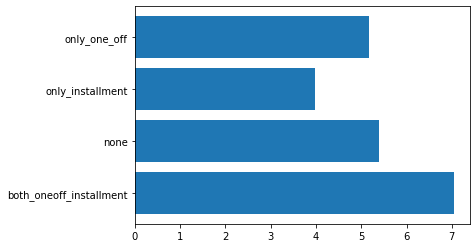

In [292]:
fig,ax=plt.subplots()
ax.barh(y=range(len(new_data)), width=new_data.values,align='center')
ax.set(yticks= np.arange(len(new_data)),yticklabels = new_data.index);

  -  From above graph we get customers with installment purchases are paying dues

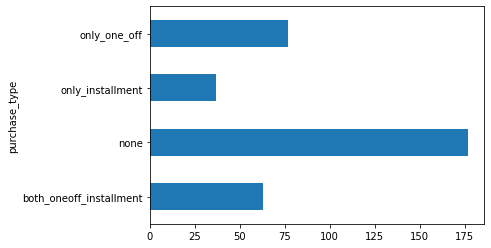

In [293]:
data.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

- From above graph we get Customers who don't do either one-off or installment purchases take more cash on advance

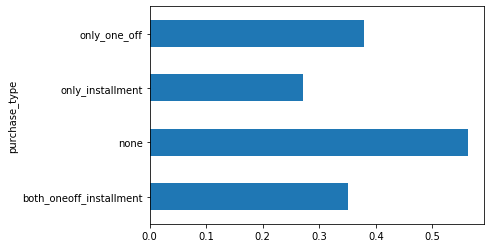

In [294]:
data.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

- From above graph we get customers with installment purchases have good credit score

In [295]:
#Original dataset with categorical column converted to number type.
data_original=pd.concat([data,pd.get_dummies(data['purchase_type'])],axis=1)

# Machine learning process:

In [171]:
data_pre['purchase_type']=data.loc[:,'purchase_type']
pd.get_dummies(data_pre['purchase_type'])

C:\Users\Robin G\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,both_oneoff_installment,none,only_installment,only_one_off
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,0,1,0
8946,0,0,1,0
8947,0,0,1,0
8948,0,1,0,0


- Now merge the created dummy with the original data frame

In [172]:
data_dummy=pd.concat([data_pre,pd.get_dummies(data_pre['purchase_type'])],axis=1)

In [173]:
x=['purchase_type']

In [174]:
data_dummy=data_dummy.drop(x,axis=1)
data_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_usage                         False
payment_minpay                      False
both_oneoff_installment             False
none                                False
only_installment                    False
only_one_off                        False
dtype: bool

- Before applying PCA we will standardize data to avoid effect of scale on our result.

# Standardrizing data(for same scale)

In [177]:
from sklearn.preprocessing import  StandardScaler

In [178]:
sc=StandardScaler()

In [179]:
data_dummy.shape

(8950, 17)

In [180]:
data_scaled=sc.fit_transform(data_dummy)

In [181]:
data_scaled

array([[-0.1572201 , -0.9883508 ,  0.39684378, ..., -0.54369045,
         1.72051649, -0.514625  ],
       [ 0.17803665, -0.9883508 , -1.08868508, ...,  1.83928189,
        -0.58122082, -0.514625  ],
       [ 0.49769432,  1.06646613, -1.08868508, ..., -0.54369045,
        -0.58122082,  1.94316249],
       ...,
       [-0.10019758, -0.9883508 ,  0.53048181, ..., -0.54369045,
         1.72051649, -0.514625  ],
       [-0.10019758, -0.9883508 , -1.08868508, ...,  1.83928189,
        -0.58122082, -0.514625  ],
       [-0.75511006,  1.1733598 , -1.08868508, ..., -0.54369045,
        -0.58122082,  1.94316249]])

# Applying PCA

Now we will apply PCA to reduce the features 

In [182]:
from sklearn.decomposition import PCA

In [183]:
#total features
data_dummy.shape

(8950, 17)

In [184]:
#We have 17 features so our n_component will be 17.
PC=PCA(n_components=17)
data_pca=PC.fit(data_scaled)

In [185]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%0%
sum(data_pca.explained_variance_ratio_)

1.0

In [186]:
var_ratio={}
for n in range(2,18):
    PC=PCA(n_components=n)
    data_pca=PC.fit(data_scaled)
    var_ratio[n]=sum(data_pca.explained_variance_ratio_)

In [187]:
var_ratio

{2: 0.5838554850042383,
 3: 0.7314413615716769,
 4: 0.8129062595041019,
 5: 0.8780561696255886,
 6: 0.9202046424881944,
 7: 0.9423944383132918,
 8: 0.9623417423122099,
 9: 0.9746779182907017,
 10: 0.9840525397654187,
 11: 0.9899949370778891,
 12: 0.9929063097610565,
 13: 0.9955399837578244,
 14: 0.9979922774493865,
 15: 0.9996333734839918,
 16: 1.0,
 17: 1.0}

There are 6 components that explains 90% varianace so we select these 6 clusters

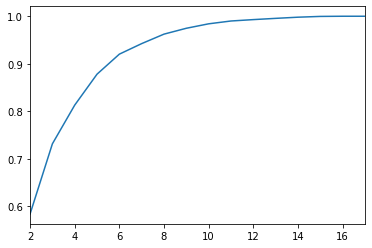

In [188]:
pd.Series(var_ratio).plot()

In [189]:
pc_final=PCA(n_components=6).fit(data_scaled)

reduced_data=pc_final.fit_transform(data_scaled)

In [190]:
dt=pd.DataFrame(reduced_data)

In [191]:
dt.head()

,0,1,2,3,4,5
0,0.238365,-2.771670,0.360073,-0.383380,-0.005450,0.003426
1,3.981816,0.159895,-0.544442,1.058445,-0.392174,-0.589509
2,-1.290982,1.505933,2.697715,-1.920426,-0.044233,-0.590389
3,1.057816,0.660118,2.503789,-1.346412,0.742033,1.437289
4,1.446335,-0.171337,2.284008,-1.613672,-0.615892,-0.708358


In [192]:
dt.shape

(8950, 6)

 - Initially we had 17 variables now its 6 and variable got reduced

In [193]:
column_list=data_dummy.columns

In [194]:
column_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_installment', 'none', 'only_installment', 'only_one_off'],
      dtype='object')

In [195]:
#eign vectors for all 6 components
pc_final.components_

array([[-0.03074926, -0.21353129, -0.31142447, -0.34536752, -0.21431812,
        -0.2948774 ,  0.21510355,  0.230376  , -0.3554018 , -0.34567389,
         0.24408893,  0.14691479, -0.1237468 , -0.24094421,  0.31005638,
        -0.0821698 ,  0.04181994],
       [ 0.23828119,  0.40673854, -0.09971257,  0.01555449,  0.36264047,
        -0.11261124,  0.28571116,  0.29108669,  0.10538342,  0.14079724,
         0.26389532,  0.23373085,  0.03355904,  0.27384551, -0.00498113,
        -0.44428565,  0.16827676],
       [-0.26703237,  0.23752665, -0.31531298, -0.16357498,  0.16130228,
        -0.32984861, -0.27902259, -0.28497811, -0.10351992,  0.02326227,
        -0.25762081, -0.25313297,  0.13538418, -0.13293331, -0.09640085,
        -0.20699806,  0.47155841],
       [-0.34467726, -0.00275015,  0.08919601, -0.07796271,  0.03421331,
         0.02299092,  0.08848696,  0.0938003 , -0.05883427, -0.08562735,
         0.1285787 , -0.43581202,  0.58393158,  0.25924104,  0.25341558,
        -0.19453101

In [196]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=column_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,-0.030749,0.238281,-0.267032,-0.344677,-0.236564,-0.692414
ONEOFF_PURCHASES,-0.213531,0.406739,0.237527,-0.002750,-0.023974,0.132181
INSTALLMENTS_PURCHASES,-0.311424,-0.099713,-0.315313,0.089196,0.000849,0.116249
PURCHASES_FREQUENCY,-0.345368,0.015554,-0.163575,-0.077963,0.113660,-0.079809
ONEOFF_PURCHASES_FREQUENCY,-0.214318,0.362640,0.161302,0.034213,-0.052029,-0.092965
PURCHASES_INSTALLMENTS_FREQUENCY,-0.294877,-0.112611,-0.329849,0.022991,0.026216,0.008863
CASH_ADVANCE_FREQUENCY,0.215104,0.285711,-0.279023,0.088487,0.362024,0.065193
CASH_ADVANCE_TRX,0.230376,0.291087,-0.284978,0.093800,0.334387,0.083037
PURCHASES_TRX,-0.355402,0.105383,-0.103520,-0.058834,0.103807,-0.006358
Monthly_avg_purchase,-0.345674,0.140797,0.023262,-0.085627,0.193416,0.017233


In [197]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.403151
PC_1    0.180705
PC_2    0.147586
PC_3    0.081465
PC_4    0.065150
PC_5    0.042148
dtype: float64

# Clustering

-  Now we calculate number of clusters required for the given data.

In [297]:
from sklearn.cluster import KMeans

In [299]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_data )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [300]:
clusters_data = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_data[0:21]

,num_clusters,cluster_errors
0,1,140009.136355
1,2,93366.462075
2,3,70776.005357
3,4,49451.678158
4,5,42491.721853
5,6,37598.778311
6,7,34050.543148
7,8,31189.778708
8,9,28487.408958
9,10,26155.560804


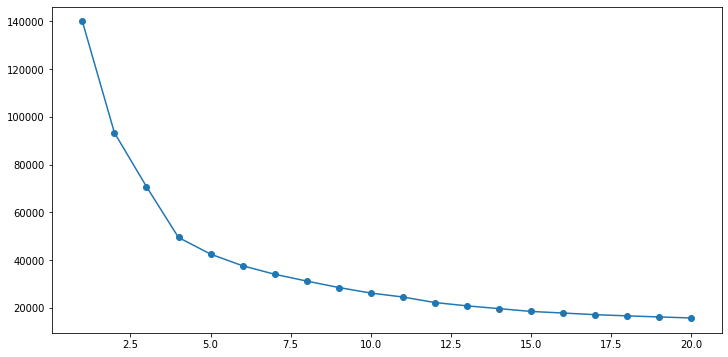

In [306]:
#checking for number of clusters using elbow graph
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_data.num_clusters, clusters_data.cluster_errors, marker = "o" )

- We get the range of cluster from graph is 4 to 7 but not sure so we will measure another approach(sillhoute measure) .

# Silhouette Measure(another measure for finding clusters)

In [307]:
from sklearn import metrics

In [308]:
# calculate SC (range always starts from 2 in clusters)
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_data)
    scores.append(metrics.silhouette_score(reduced_data, km.labels_))

In [309]:
scores

[0.3317042406209458,
 0.35304929190354284,
 0.4355196566421153,
 0.42967875876860984,
 0.42242193911174863,
 0.4004530100527071,
 0.39989708927313156,
 0.3885990712722355,
 0.36455446720451684,
 0.3672598561272663,
 0.366677738272243,
 0.3534000287615403,
 0.3536576891736085,
 0.34590361555520704,
 0.33649921609553635,
 0.34178357643066404,
 0.336078299530693,
 0.3256919874836864,
 0.32628651486076277]

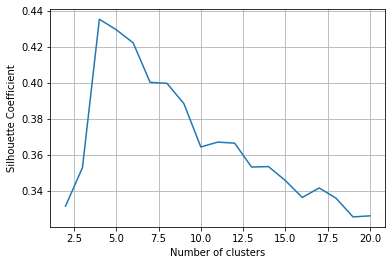

In [310]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

This measure clearly give us 4 cluster so we will stick to 4 clusters but also check for 5 and 6 clusters.

# Finding behaviour with 4 clusters

In [327]:
#checking for 4 clusters
km_4=KMeans(n_clusters=4,random_state=123)

In [328]:
km_4.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [329]:
km_4.labels_

array([0, 1, 3, ..., 0, 1, 3])

In [330]:
#each cluster containing observations
pd.Series(km_4.labels_).value_counts()

2    2769
0    2222
1    2090
3    1869
dtype: int64

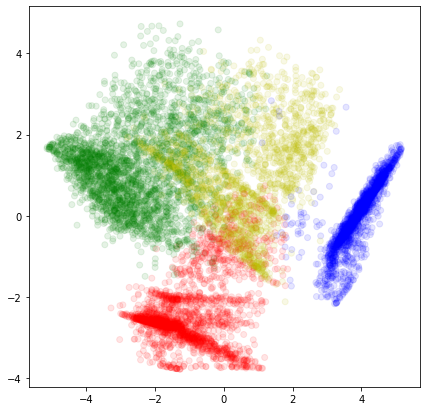

In [331]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=label_color,cmap='Spectral',alpha=0.1)


 - It is very difficult to draw individual plot for cluster, so we will use pair plot which will provide us all graph in one shot. To do that we need to take following steps

In [332]:
data_pair_plot=pd.DataFrame(reduced_data,columns=['PC_' +str(i) for i in range(6)])

In [333]:
data_pair_plot['Cluster']=km_4.labels_

In [334]:
data_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster
0,0.238365,-2.771670,0.360073,-0.383380,-0.005450,0.003426,0
1,3.981816,0.159895,-0.544442,1.058445,-0.392174,-0.589509,1
2,-1.290982,1.505933,2.697715,-1.920426,-0.044233,-0.590389,3
3,1.057816,0.660118,2.503789,-1.346412,0.742033,1.437289,3
4,1.446335,-0.171337,2.284008,-1.613672,-0.615892,-0.708358,3


C:\Users\Robin G\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


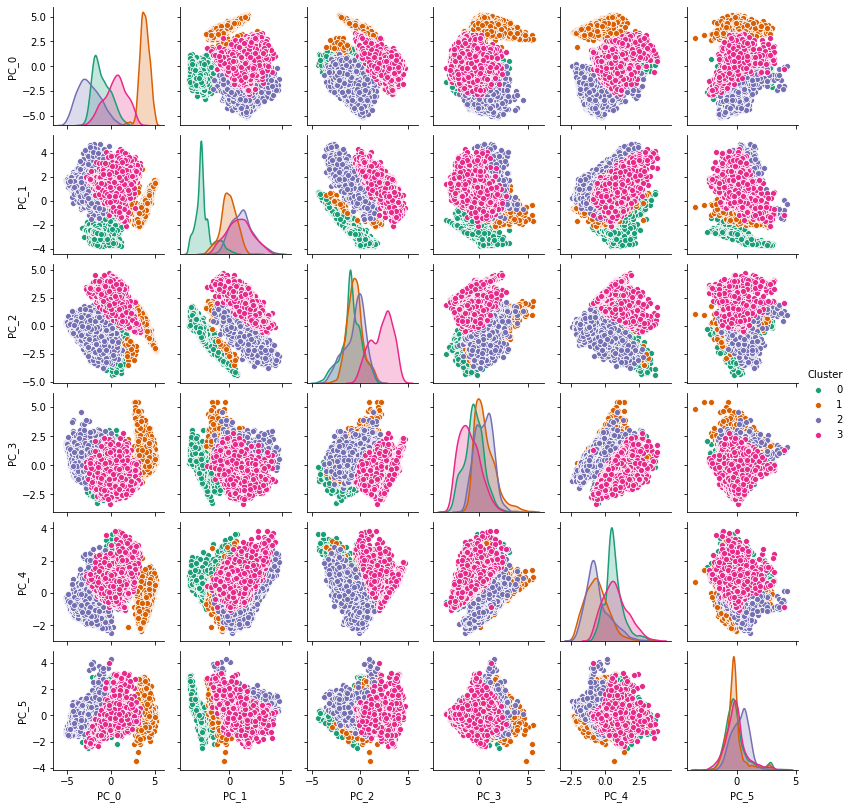

In [335]:
#pairwise scatter plot relationship of component on the data
sns.pairplot(data_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [336]:
# Key performace variable selection . here i am dropping varibales which are used in derving new KPI
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','only_installment','only_one_off','none','CREDIT_LIMIT']

In [337]:
data_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.620717,3.199459,3.348077,0.361268,0.158699,0.270072,0.112929,0.813785,1.891305,3.046372,2.160831,0.294688,1.341853
std,0.145539,3.237351,3.075512,0.277317,0.216672,0.281852,0.154677,0.998266,1.365930,1.993794,2.423444,0.247833,0.902810
min,0.087011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040614,0.645689
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.263891,1.102974
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.535461,1.946465
max,0.693147,8.808503,8.265455,0.693147,0.693147,0.693147,0.606136,3.401197,4.766523,7.260703,7.377151,1.109743,6.522176


In [338]:
# Conactenating labels found through Kmeans with data 
cluster_data_4=pd.concat([data_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [339]:
cluster_data_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,only_installment,only_one_off,none,CREDIT_LIMIT,Cluster_4
0,2.0,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,0
1,0.0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12.0,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,3
3,1.0,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,3
4,1.0,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,3


In [340]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_data_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,11.909329,0.045933,31.481697,6.914687
Monthly_avg_purchase,46.815076,0.149005,177.155647,67.470662
Monthly_cash_advance,32.258557,179.847652,62.608543,76.003456
limit_usage,0.263301,0.566157,0.351510,0.377888
CASH_ADVANCE_TRX,0.982898,6.151196,2.629830,2.802568
payment_minpay,3.998517,5.347167,7.047059,5.177466
both_oneoff_installment,0.000000,0.001914,1.000000,0.000535
only_installment,1.000000,0.018182,0.000000,0.000000
only_one_off,0.000000,0.002871,0.000000,0.999465
none,0.000000,0.977033,0.000000,0.000000


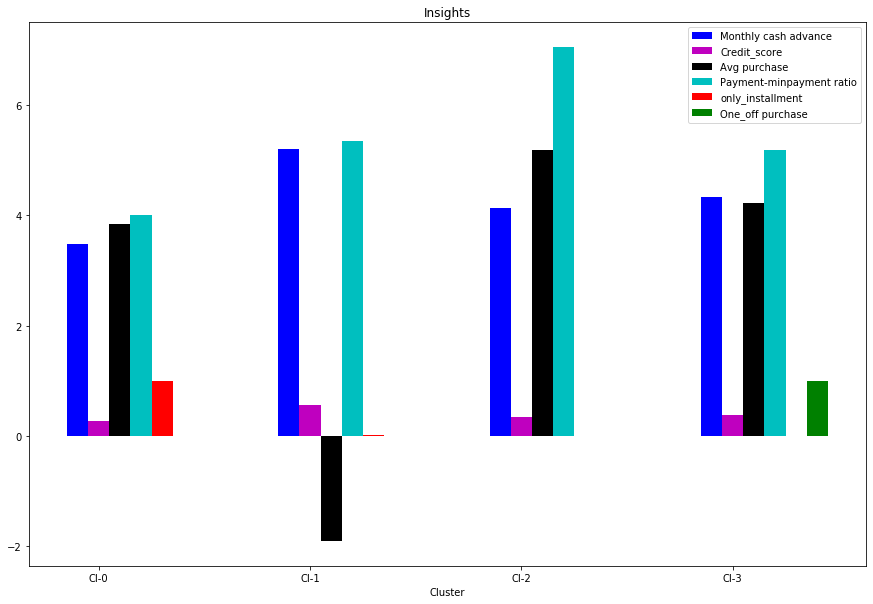

In [341]:
#plotting for 4 clusters
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['only_installment',:].values
one_off=cluster_4.loc['only_one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='only_installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

#  Clusters are clearly distinguishing behavior with 4

In [343]:
s=cluster_data_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_data_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4   
0          0    2222
1          1    2090
2          2    2769
3          3    1869
Name: Cluster_4, dtype: int64
Cluster -4 
   Size  Percentage
0  2222   24.826816
1  2090   23.351955
2  2769   30.938547
3  1869   20.882682


# Now finding behaviour with 5 clusters

In [344]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_data)
km_5.labels_

array([1, 2, 0, ..., 1, 2, 0])

In [345]:
pd.Series(km_5.labels_).value_counts()

1    2147
2    2083
3    1967
0    1869
4     884
dtype: int64

Text(0, 0.5, 'PC_1')

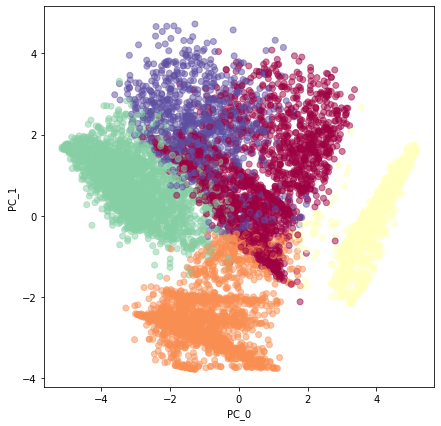

In [346]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [347]:
cluster_data_5=pd.concat([data_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [348]:
# Finding Mean of features for each cluster
cluster_data_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,6.885259,11.743144,0.034085,32.858236,27.003020
Monthly_avg_purchase,67.054396,46.521756,0.097688,189.388927,139.188683
Monthly_cash_advance,74.888191,20.273589,179.052078,3.933223,224.862067
limit_usage,0.377209,0.248846,0.566162,0.256002,0.594773
CASH_ADVANCE_TRX,2.760835,0.543083,6.088814,0.146924,9.346154
payment_minpay,5.170517,4.038666,5.351987,8.467662,3.519774
both_oneoff_installment,0.002140,0.000000,0.000000,1.000000,0.908371
only_installment,0.000000,1.000000,0.016803,0.000000,0.088235
only_one_off,0.997860,0.000000,0.002880,0.000000,0.003394
none,0.000000,0.000000,0.980317,0.000000,0.000000


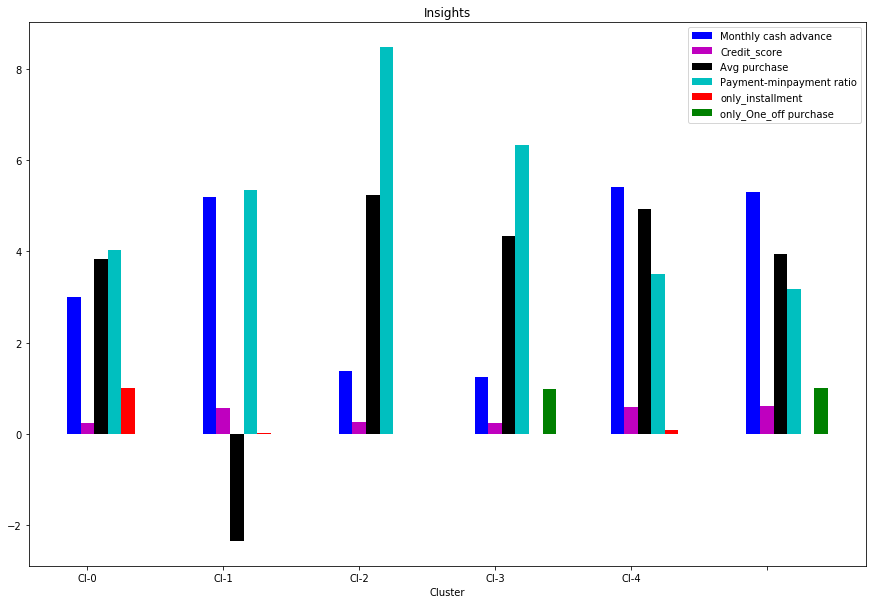

In [349]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['only_installment',:].values
one_off=six_cluster.loc['only_one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='only_installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='only_One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4'))

plt.legend()

# Conclusion With 5 clusters :

- Cluster 3 and Cluster 4 are behaving similar in terms of Credit_limit,average purchase and have cash transactions is on higher side so there is no need to make two different clusters for similar behaviour.
- cluster of 5 looks irrevelant.

In [350]:
s1=cluster_data_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print (s1)

Cluster_5   
0          0    1869
1          1    2147
2          2    2083
3          3    1967
4          4     884
Name: Cluster_5, dtype: int64


In [351]:
# percentage of each cluster

print ("Cluster-5"),'\n'
per_5=pd.Series((s1.values.astype('float')/ cluster_data_5.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5
   Size  Percentage
0  1869   20.882682
1  2147   23.988827
2  2083   23.273743
3  1967   21.977654
4   884    9.877095


# Finding behaviour with 6 clusters

In [352]:
km_6=KMeans(n_clusters=6).fit(reduced_data)
km_6.labels_

array([1, 2, 0, ..., 1, 2, 5])

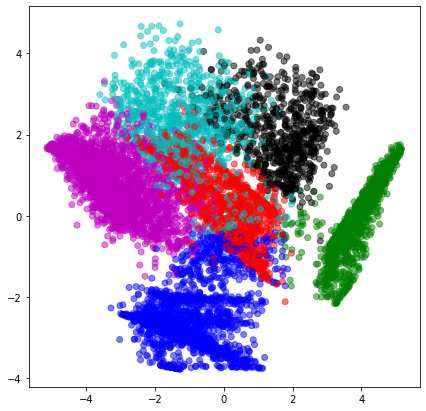

In [353]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [354]:
cluster_data_6 = pd.concat([data_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [355]:
six_cluster=cluster_data_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,7.526706,11.743144,0.031295,27.016652,32.933818,5.798447
Monthly_avg_purchase,75.955320,46.521756,0.095434,138.659842,189.832865,52.116972
Monthly_cash_advance,3.483171,20.273589,178.694432,223.179606,3.943247,199.182879
limit_usage,0.244300,0.248846,0.565878,0.594792,0.256642,0.601518
CASH_ADVANCE_TRX,0.124471,0.543083,6.069331,9.286039,0.147299,7.366097
payment_minpay,6.329022,4.038666,5.356357,3.515954,8.484546,3.184181
both_oneoff_installment,0.007621,0.000000,0.000000,0.911464,1.000000,0.000000
only_installment,0.000000,1.000000,0.016851,0.088536,0.000000,0.000000
only_one_off,0.992379,0.000000,0.000000,0.000000,0.000000,1.000000
none,0.000000,0.000000,0.983149,0.000000,0.000000,0.000000


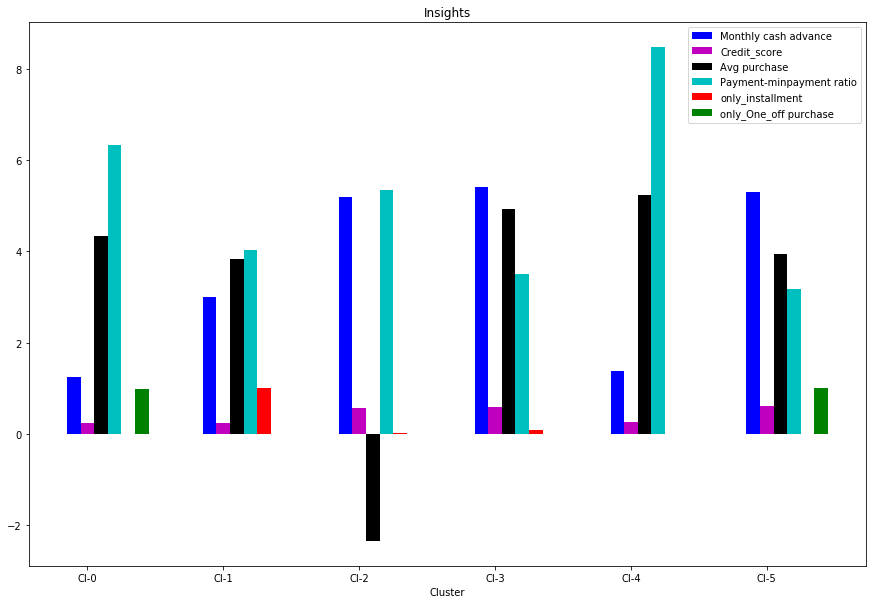

In [356]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['only_installment',:].values
one_off=six_cluster.loc['only_one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='only_installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='only_One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

# Conclusion with 6 clusters:

 - Here groups are overlapping in 6 clusters(cluster 2 with 3 and cluster 4 with 5)
 - cluster with 6 also looks irrelevent.

In [357]:
s2=cluster_data_6.groupby('Cluster_6').apply(lambda x: x['Cluster_6'].value_counts())
print (s2)

Cluster_6   
0          0    1181
1          1    2147
2          2    2077
3          3     881
4          4    1962
5          5     702
Name: Cluster_6, dtype: int64


In [358]:
# percentage of all 6 cluster

print ("Cluster-6"),'\n'
per_6=pd.Series((s2.values.astype('float')/ cluster_data_6.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s2.values,name='Size'),per_6],axis=1))

Cluster-6
   Size  Percentage
0  1181   13.195531
1  2147   23.988827
2  2077   23.206704
3   881    9.843575
4  1962   21.921788
5   702    7.843575


# K-means with 4 cluster is able to show distinguished characteristics of each cluster.So we finalize the model with 4 clusters only.

# Insights with 4 Clusters

- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off purchases, have comparatively good credit score. This group is about 31% of the total customer base.



- Cluster 1 is taking maximum advance_cash and is paying comparatively less minimum payment and high credit_score & doing no purchase transaction. This group is about 23% of the total customer base.




- Cluster 3 customers are doing maximum One_Off transactions and least payment ratio and average credit_score. This group is about 21% of the total customer base



- Cluster 0 customers have maximum credit score and are paying dues and are doing maximum installment purchases. * This group is about 25% of the total customer base *

# Marketing Strategy Suggested:

 a. Group 2

- They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score ) -- we can increase credit limit or can lower down interest rate -- Can be given premium card /loyality cards to increase transactions

b. Group 1

 - They have high credit score but taking only cash on advance. We can target them by providing less interest rate on purchase transaction

c. Group 3

 - This group has less paying ratio comparatively and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.

d. Group 0

- This group is performing best among all as cutomers are maintaining good credit score and paying dues on time. Giving rewards point will make them perform more purchases.